In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import skimage.filters as filter
from scipy.signal import argrelextrema
from scipy.signal import medfilt
%matplotlib inline

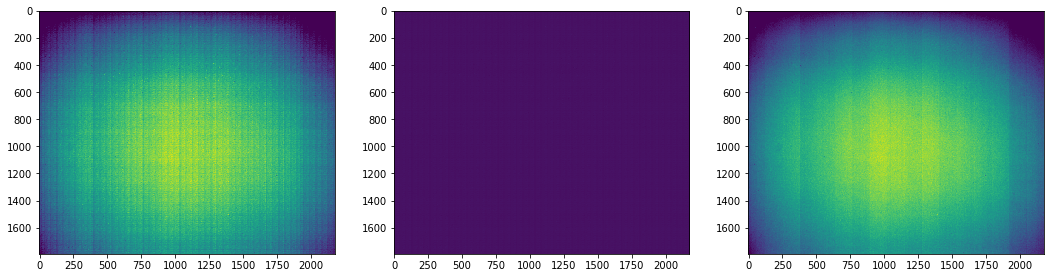

In [5]:
ob=io.imread('../../data/cbct/ob_3s_5fps_60kV_150uA_00001.tif').astype(float)
plt.figure(figsize=(18,12))

plt.subplot(1,3,1)
mean=np.mean(ob)
std=np.std(ob)
plt.imshow(ob,vmin=mean-2*std,vmax=mean+2*std)

dc=io.imread('../../data/cbct/dc_3s_5fps_00001.tif').astype(float)
plt.subplot(1,3,2)
plt.imshow(dc)

plt.subplot(1,3,3)

ob-=dc
mean=np.mean(ob)
std=np.std(ob)
plt.imshow(ob,vmin=mean-2*std, vmax=mean+2*std)

In [6]:
dims=ob.shape
marg=0.8
thres=3
offset=(np.floor(dims[0]*0.5*(1-marg)).astype(int), np.floor(dims[1]*0.5*(1-marg)).astype(int))

cropped=ob[offset[0]:(offset[0]+np.floor(marg*dims[0]).astype(int)),offset[1]:(offset[1]+np.floor(marg*dims[1]).astype(int))]


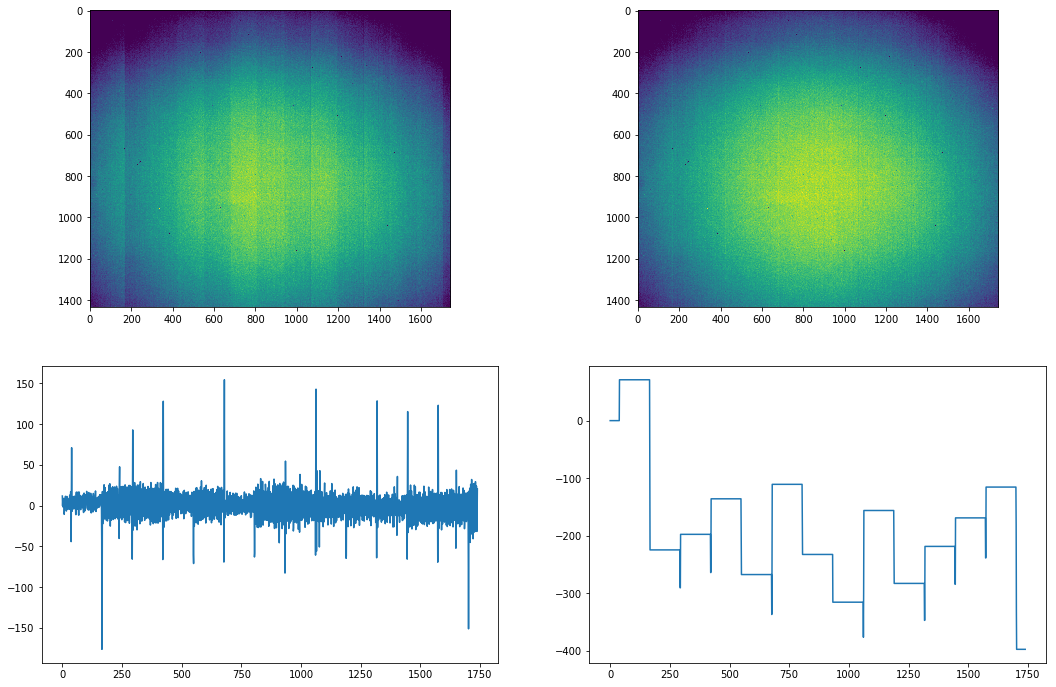

In [7]:
# Correcting gain bias

plt.figure(figsize=(18,12))
dx=np.gradient(cropped);

p=np.mean(dx[1],axis=0)

m=np.mean(p)
s=np.std(p)
tp=(thres<abs((p-m)/s))*p

cp=np.cumsum(tp)


corr=np.outer(np.ones(cropped.shape[0]),cp)
cob=cropped-corr

# Display results of the gain correction
plt.subplot(2,2,3)
plt.plot(p)

plt.subplot(2,2,4)
plt.plot(cp)

m=np.mean(cob)
s=np.std(cob)

plt.subplot(2,2,1)
plt.imshow(cropped,vmin=m-2*s, vmax=m+2*s)

plt.subplot(2,2,2)
plt.imshow(cob,vmin=m-2*s, vmax=m+2*s)

In [8]:
#x=x+marg; y=y+marg;
dims=cob.shape
N=np.prod(dims)
x,y=np.meshgrid(np.arange(0,dims[0]),np.arange(0,dims[1]))

a=x*y

H=[np.ones((N,1)), np.reshape(x,(N,1)), np.reshape(x,(N,1)), np.reshape(x*y,(N,1)), np.reshape(x*x,(N,1)), np.reshape(y*y,(N,1))]
H=np.transpose(np.reshape(np.asarray(H),(6,N)))
q=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(H),H)),np.transpose(H)),np.reshape(cob,(N,1)))
#
#H=[ones(numel(x),1) x(:) y(:) x(:).*y(:) x(:).^2 y(:).^2];
#%e=(cob2(:))\H;
#info.e=inv(H'*H)*H'*info.mob(:);
#info.est=reshape(H*info.e, size(info.mob));

print(q)


LinAlgError: Singular matrix

In [72]:
#% Finding the coordinates of the max
#% $I(x,y) = a + b x + c y + d xy + e x^2 + f y^2$
#% 
#% 
#% $\partial I(x,y)/\partial x = b + d y + 2e * x = 0$
#%
#% $\partial I(x,y)/ \partial y = c + d x + 2f * y = 0$
#% 
#% $\left(\begin{array}{cc}2e &d\\ d & 2f\end{array}\right) \left(\begin{array}{c}x \\y\end{array}\right)=\left(\begin{array}{c}-b\\-c\end{array}\right)$
#%
#
#
#H=[ 2*info.e(5) info.e(4); info.e(4) 2*info.e(6)];
#k=[ -info.e(2) -info.e(3)]';
#
#info.pos=inv(H)*k;

Hp=np.reshape(np.asarray([[2*q[4], q[3]],[q[3], 2*q[5]]]),(2,2))
k=np.reshape(np.asarray(np.transpose([-q[1], -q[2]])),(2,1))

pos=np.matmul(np.linalg.inv(Hp),k)
print(pos)

[[  2.17818357e+20]
 [ -5.80302705e+20]]


In [70]:
whos

Variable        Type        Data/Info
-------------------------------------
H               ndarray     2493420x6: 14960520 elems, type `float64`, 119684160 bytes (114.13970947265625 Mb)
Hp              ndarray     2x2: 4 elems, type `float64`, 32 bytes
N               int64       2493420
a               ndarray     1740x1433: 2493420 elems, type `int64`, 19947360 bytes (19.023284912109375 Mb)
argrelextrema   function    <function argrelextrema at 0x1125ea2f0>
cob             ndarray     1433x1740: 2493420 elems, type `float64`, 19947360 bytes (19.023284912109375 Mb)
corr            ndarray     1433x1740: 2493420 elems, type `float64`, 19947360 bytes (19.023284912109375 Mb)
cp              ndarray     1740: 1740 elems, type `float64`, 13920 bytes
cropped         ndarray     1433x1740: 2493420 elems, type `float64`, 19947360 bytes (19.023284912109375 Mb)
dc              ndarray     1792x2176: 3899392 elems, type `float64`, 31195136 bytes (29.75 Mb)
dims            tuple       n=2
dx    

In [10]:
a=[[1,2,3], [4,5,6]]

In [11]:
print(a)

[[1, 2, 3], [4, 5, 6]]


In [14]:
np.matmul(a,np.transpose(a))

array([[14, 32],
       [32, 77]])